# Final Project - Forecasting #

In [ ]:
!pip install prophet
!pip install pmdarima
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Below for basic calculations and dataframe creation
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timezone

#Map visualisation
import folium
from folium import plugins

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

#Forecasting (to be performed in Google Collab)
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
from prophet.plot import add_changepoints_to_plot

import pmdarima as pm
from pmdarima.arima import ndiffs
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['forecast_counters2018_to2021.csv']))
df.head()

,Date_Full,Bikes_Recorded
0,2018-01-01,173656.0
1,2018-02-01,128877.0
2,2018-03-01,193909.0
3,2018-04-01,253046.0
4,2018-05-01,285148.0


In [ ]:
df

,Date_Full,Bikes_Recorded
0,2018-01-01,173656.0
1,2018-02-01,128877.0
2,2018-03-01,193909.0
3,2018-04-01,253046.0
4,2018-05-01,285148.0
5,2018-06-01,313250.0
6,2018-07-01,376619.0
7,2018-08-01,315420.0
8,2018-09-01,486216.0
9,2018-10-01,519096.0


In [ ]:
df2 = sum(df['Bikes_Recorded'])
df2

65987835.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_Full       48 non-null     object 
 1   Bikes_Recorded  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [ ]:
df['Date_Full'] = pd.DatetimeIndex(df['Date_Full'])
df.dtypes

Date_Full         datetime64[ns]
Bikes_Recorded           float64
dtype: object

In [ ]:
df = df.rename(columns={'Date_Full': 'ds',
                        'Bikes_Recorded': 'y'})

df.head()

,ds,y
0,2018-01-01,173656.0
1,2018-02-01,128877.0
2,2018-03-01,193909.0
3,2018-04-01,253046.0
4,2018-05-01,285148.0


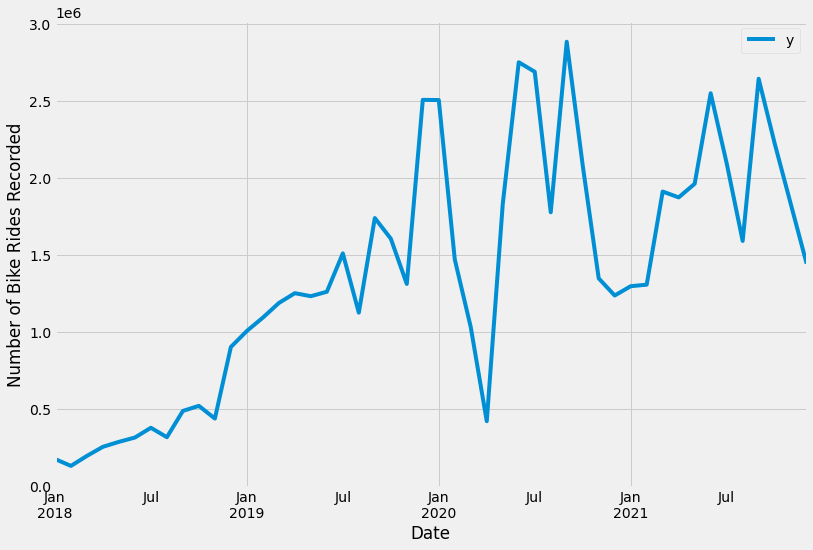

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Number of Bike Rides Recorded')
ax.set_xlabel('Date')

plt.show()

**Time Series Forecasting with Prophet**

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/chi1iyzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/jbpysvuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14620', 'data', 'file=/tmp/tmp4zn6cxqr/chi1iyzn.json', 'init=/tmp/tmp4zn6cxqr/jbpysvuc.json', 'output', 'file=/tmp/tmp4zn6cxqr/prophet_modeljvtq0m7z/prophet_model-20221208100516.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01


In [ ]:
forecast = my_model.predict(future_dates,)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,430456.160699,-379637.018366,1.217261e+06
1,2018-02-01,348344.907010,-414421.714197,1.177115e+06
2,2018-03-01,234457.904950,-616989.536846,1.061529e+06
3,2018-04-01,321272.753502,-437981.199269,1.112212e+06
4,2018-05-01,578984.912114,-250501.674726,1.366777e+06


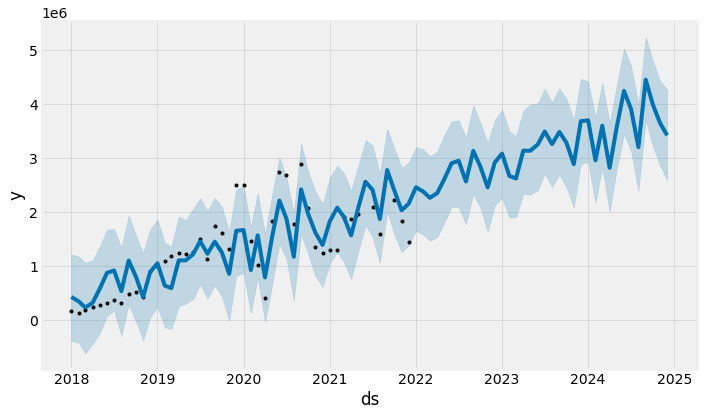

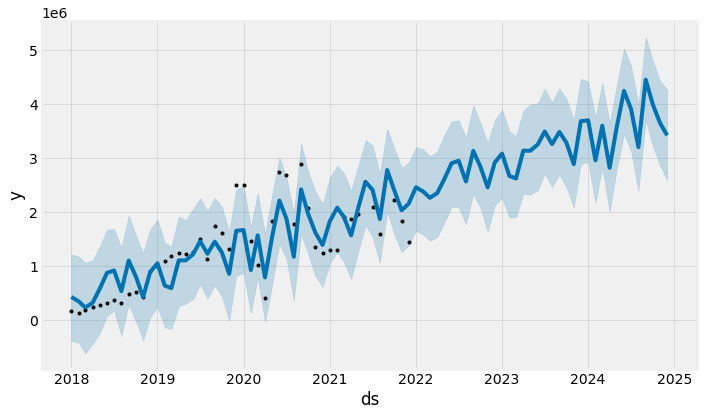

In [ ]:
my_model.plot(forecast, uncertainty=True)

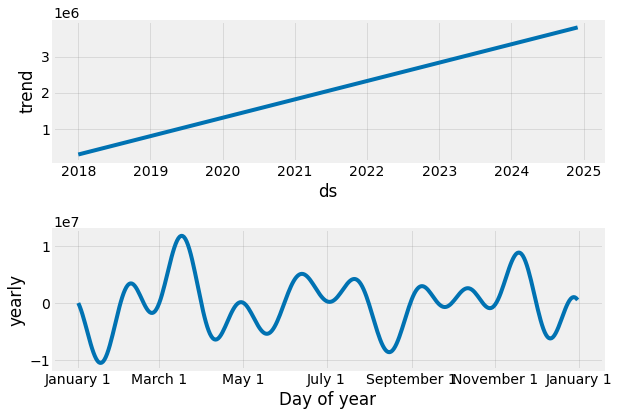

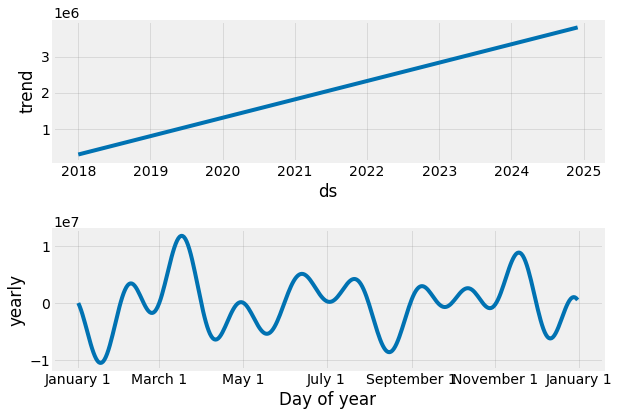

In [ ]:
my_model.plot_components(forecast)

**Plotting the forecasted components**

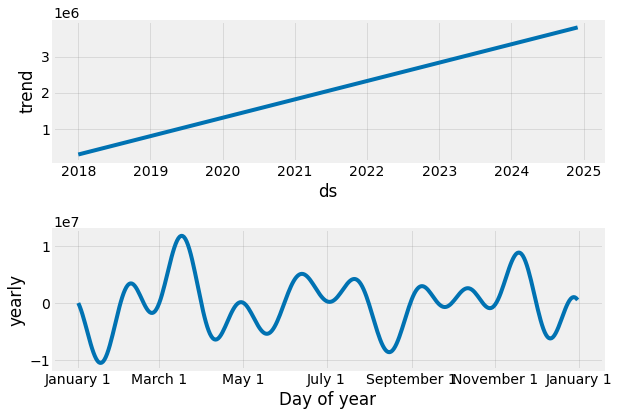

In [ ]:
fig1 = my_model.plot_components(forecast)

**Adding ChangePoints to Prophet**

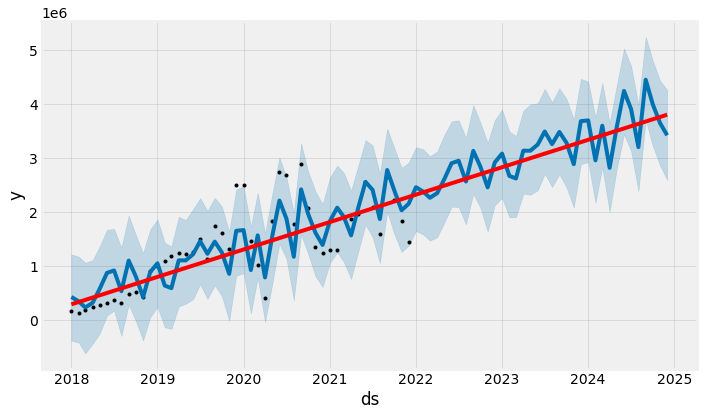

In [ ]:
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/uyyvq35h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/810s1zj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16307', 'data', 'file=/tmp/tmp4zn6cxqr/uyyvq35h.json', 'init=/tmp/tmp4zn6cxqr/810s1zj0.json', 'output', 'file=/tmp/tmp4zn6cxqr/prophet_modelj8atq_bf/prophet_model-20221208100537.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


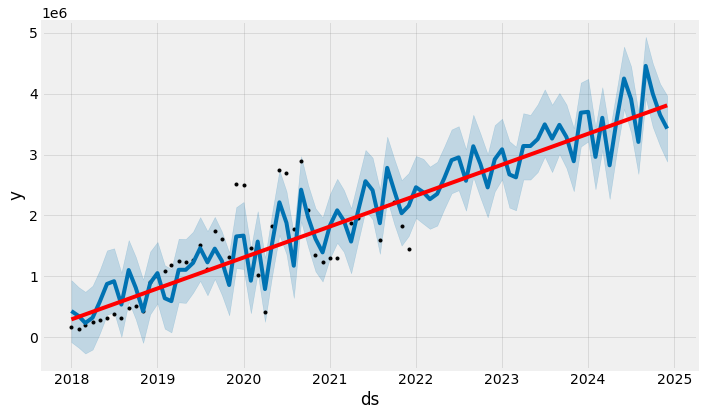

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/zirfe6f5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/9wf7krdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53242', 'data', 'file=/tmp/tmp4zn6cxqr/zirfe6f5.json', 'init=/tmp/tmp4zn6cxqr/9wf7krdo.json', 'output', 'file=/tmp/tmp4zn6cxqr/prophet_modeltfg0vxx0/prophet_model-20221208100540.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


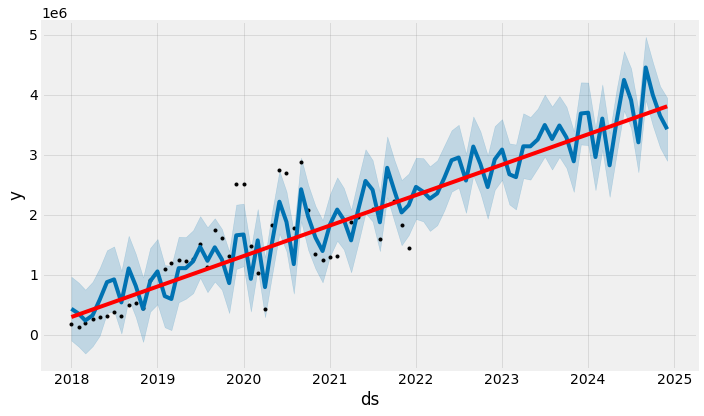

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

**Adjusting Trend**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/wpsi5k9_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/vxg304d9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69084', 'data', 'file=/tmp/tmp4zn6cxqr/wpsi5k9_.json', 'init=/tmp/tmp4zn6cxqr/vxg304d9.json', 'output', 'file=/tmp/tmp4zn6cxqr/prophet_modelz5u8ogjh/prophet_model-20221208100544.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


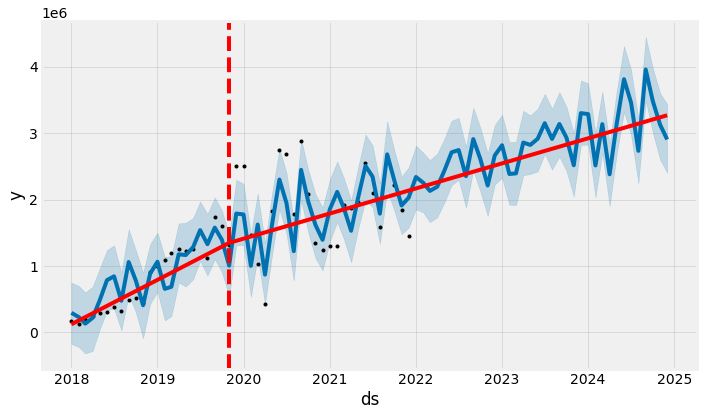

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/xf2cmsz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zn6cxqr/ihuik9ff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6789', 'data', 'file=/tmp/tmp4zn6cxqr/xf2cmsz_.json', 'init=/tmp/tmp4zn6cxqr/ihuik9ff.json', 'output', 'file=/tmp/tmp4zn6cxqr/prophet_modelwnw8k8kr/prophet_model-20221208100550.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


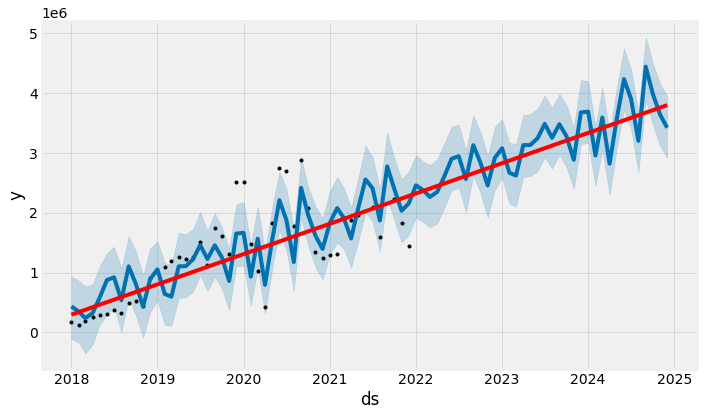

In [ ]:
#Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible.

pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from google.colab import files
forecast.to_csv('Paris_bikes_forecast.csv') 
files.download('Paris_bikes_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')